In [1]:
import numpy as np
import time 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.metrics import Precision,Recall,Accuracy

In [2]:
class F1_Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.f1 = self.add_weight(name='f1', initializer='zeros')
        self.precision_fn = Precision(thresholds=0.5)
        self.recall_fn = Recall(thresholds=0.5)

    def update_state(self, y_true, y_pred, sample_weight=None):
        p = self.precision_fn(y_true, y_pred)
        r = self.recall_fn(y_true, y_pred)
        # since f1 is a variable, we use assign
        self.f1.assign(2 * ((p * r) / (p + r + 1e-6)))

    def result(self):
        return self.f1

    def reset_states(self):
        # we also need to reset the state of the precision and recall objects
        self.precision_fn.reset_states()
        self.recall_fn.reset_states()
        self.f1.assign(0)

In [3]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()
split=int(0.2*(X_train.shape[0]))
X_validation=X_train[:split]
y_validation=y_train[:split]
X_train=X_train[split:]
y_train=y_train[split:]

In [1]:
print("X_train shape : {}\ny_train shape : {}\nX_validation shape : {}\ny_validation shape : {}\nX_test shape : {}\ny_test shape : {}".format(X_train.shape,y_train.shape,X_validation.shape,y_validation.shape,X_test.shape,y_test.shape))

SyntaxError: EOL while scanning string literal (<ipython-input-1-722e29cc29fd>, line 1)

In [5]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
def plot_sample(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index][0]])

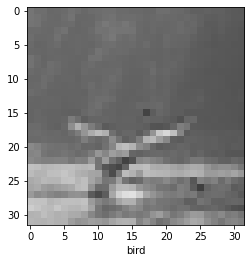

In [7]:
plot_sample(X_train,y_train,1006)

In [8]:
X_train,X_validation,X_test = X_train/255,X_validation/255,X_test/255
y_train = tf.reshape(tf.one_hot(y_train,10),(y_train.shape[0],10)).numpy()
y_validation = tf.reshape(tf.one_hot(y_validation,10),(y_validation.shape[0],10)).numpy()

# Basic model

In [9]:
NAME='BasicModel {}'.format(int(time.time()))
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy',F1_Score()])
time1 = time.time()
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=32,callbacks=[tensorboard])
time2 = time.time()
print("Time: ",time2-time1)

y_pred=model.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report\n", classification_report(y_test,y_pred_classes))

Epoch 1/5
   1/1250 [..............................] - ETA: 0s - loss: 2.3001 - accuracy: 0.1250 - f1_score: 0.0000e+00WARNING:tensorflow:From C:\Users\Andrew\anaconda3\envs\NAVI\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 [==============================] - 38s 31ms/step - loss: 1.5540 - accuracy: 0.4301 - f1_score: 0.3073 - val_loss: 1.2535 - val_accuracy: 0.5435 - val_f1_score: 0.4821
Epoch 2/5
1250/1250 [==============================] - 46s 37ms/step - loss: 1.1960 - accuracy: 0.5752 - f1_score: 0.5219 - val_loss: 1.0885 - val_accuracy: 0.6149 - val_f1_score: 0.5824
Epoch 3/5
1250/1250 [==============================] - 45s 36ms/step - loss: 1.0307 - accuracy: 0.6342 - f1_score: 0.6041 - val_loss: 1.0376 - val_accuracy: 0.6355 - val_f1_score: 0.6034
Epoch 4/5
1250/1250 [================

# Change Number of Filters

In [10]:
#Third convolution has more filters (128 instead of 64)
NAME='HighFilters {}'.format(int(time.time()))
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy',F1_Score()])
time1 = time.time()
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=32,callbacks=[tensorboard])
time2 = time.time()
print("Time: ",time2-time1)

y_pred=model.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report\n", classification_report(y_test,y_pred_classes))
#Apply changes

Epoch 1/5
1250/1250 [==============================] - 46s 37ms/step - loss: 1.5031 - accuracy: 0.4512 - f1_score: 0.3473 - val_loss: 1.1601 - val_accuracy: 0.5853 - val_f1_score: 0.5254
Epoch 2/5
1250/1250 [==============================] - 49s 39ms/step - loss: 1.1034 - accuracy: 0.6108 - f1_score: 0.5725 - val_loss: 1.0627 - val_accuracy: 0.6273 - val_f1_score: 0.6068
Epoch 3/5
1250/1250 [==============================] - 46s 36ms/step - loss: 0.9279 - accuracy: 0.6730 - f1_score: 0.6550 - val_loss: 0.9241 - val_accuracy: 0.6810 - val_f1_score: 0.6684
Epoch 4/5
1250/1250 [==============================] - 46s 37ms/step - loss: 0.8116 - accuracy: 0.7159 - f1_score: 0.7037 - val_loss: 0.8609 - val_accuracy: 0.7037 - val_f1_score: 0.6874
Epoch 5/5
1250/1250 [==============================] - 46s 37ms/step - loss: 0.7140 - accuracy: 0.7507 - f1_score: 0.7429 - val_loss: 0.8516 - val_accuracy: 0.7088 - val_f1_score: 0.7091
Time:  234.18671488761902
Classification report
               pr

# Change Filters' Dimensions

In [11]:
#Convolutions have higher kernel_size (4,4)
NAME='HighFiltersDim {}'.format(int(time.time()))
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(4,4),strides=(1,1),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(4,4),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,kernel_size=(4,4),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy',F1_Score()])
time1 = time.time()
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=32,callbacks=[tensorboard])
time2 = time.time()
print("Time: ",time2-time1)

y_pred=model.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report\n", classification_report(y_test,y_pred_classes))

Epoch 1/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.5911 - accuracy: 0.4125 - f1_score: 0.2746 - val_loss: 1.3402 - val_accuracy: 0.5149 - val_f1_score: 0.4035
Epoch 2/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.2310 - accuracy: 0.5595 - f1_score: 0.5032 - val_loss: 1.1331 - val_accuracy: 0.5999 - val_f1_score: 0.5537
Epoch 3/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.0554 - accuracy: 0.6306 - f1_score: 0.6008 - val_loss: 1.0730 - val_accuracy: 0.6279 - val_f1_score: 0.6116
Epoch 4/5
1250/1250 [==============================] - 44s 35ms/step - loss: 0.9339 - accuracy: 0.6714 - f1_score: 0.6547 - val_loss: 1.0070 - val_accuracy: 0.6546 - val_f1_score: 0.6413
Epoch 5/5
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8431 - accuracy: 0.7048 - f1_score: 0.6927 - val_loss: 0.9780 - val_accuracy: 0.6616 - val_f1_score: 0.6545
Time:  216.08025407791138
Classification report
               pr

In [12]:
# Convolutions have lower kernel_size (2,2)
NAME='LowerFiltersDim {}'.format(int(time.time()))
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy',F1_Score()])
time1 = time.time()
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=32,callbacks=[tensorboard])
time2 = time.time()
print("Time: ",time2-time1)

y_pred=model.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report\n", classification_report(y_test,y_pred_classes))
#Apply changes

Epoch 1/5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.4537 - accuracy: 0.4720 - f1_score: 0.3726 - val_loss: 1.1094 - val_accuracy: 0.6087 - val_f1_score: 0.5427
Epoch 2/5
1250/1250 [==============================] - 44s 35ms/step - loss: 1.0551 - accuracy: 0.6283 - f1_score: 0.5950 - val_loss: 1.0197 - val_accuracy: 0.6418 - val_f1_score: 0.6163
Epoch 3/5
1250/1250 [==============================] - 46s 37ms/step - loss: 0.8823 - accuracy: 0.6920 - f1_score: 0.6752 - val_loss: 0.9295 - val_accuracy: 0.6736 - val_f1_score: 0.6641
Epoch 4/5
1250/1250 [==============================] - 47s 38ms/step - loss: 0.7477 - accuracy: 0.7377 - f1_score: 0.7296 - val_loss: 0.8949 - val_accuracy: 0.6870 - val_f1_score: 0.6863
Epoch 5/5
1250/1250 [==============================] - 46s 36ms/step - loss: 0.6447 - accuracy: 0.7731 - f1_score: 0.7687 - val_loss: 0.8102 - val_accuracy: 0.7143 - val_f1_score: 0.7139
Time:  227.7554976940155
Classification report
               pre

# Change Strides

In [13]:
#Strides are bigger (2,2)
NAME='StridesBigger {}'.format(int(time.time()))
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(2,2),strides=(2,2),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(2,2),strides=(2,2),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,kernel_size=(2,2),strides=(2,2),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy',F1_Score()])
time1 = time.time()
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=32,callbacks=[tensorboard])
time2 = time.time()
print("Time: ",time2-time1)

y_pred=model.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report\n", classification_report(y_test,y_pred_classes))

Epoch 1/5
1250/1250 [==============================] - 12s 9ms/step - loss: 1.7288 - accuracy: 0.3555 - f1_score: 0.1694 - val_loss: 1.4724 - val_accuracy: 0.4581 - val_f1_score: 0.3357
Epoch 2/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4147 - accuracy: 0.4810 - f1_score: 0.3849 - val_loss: 1.3470 - val_accuracy: 0.5045 - val_f1_score: 0.4361
Epoch 3/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2951 - accuracy: 0.5302 - f1_score: 0.4655 - val_loss: 1.3663 - val_accuracy: 0.5106 - val_f1_score: 0.4437
Epoch 4/5
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2151 - accuracy: 0.5618 - f1_score: 0.5089 - val_loss: 1.2213 - val_accuracy: 0.5646 - val_f1_score: 0.5120
Epoch 5/5
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1563 - accuracy: 0.5829 - f1_score: 0.5436 - val_loss: 1.1827 - val_accuracy: 0.5790 - val_f1_score: 0.5184
Time:  51.71679711341858
Classification report
               precision 

# Change Padding

In [14]:
#Padding=valid
NAME='PaddingValid {}'.format(int(time.time()))
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',padding='valid',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=(2,2),strides=(1,1),activation='relu',padding='valid'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,kernel_size=(2,2),strides=(1,1),activation='relu',padding='valid'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy',F1_Score()])
time1 = time.time()
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=32,callbacks=[tensorboard])
time2 = time.time()
print("Time: ",time2-time1)

y_pred=model.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report\n", classification_report(y_test,y_pred_classes))

Epoch 1/5
1250/1250 [==============================] - 46s 37ms/step - loss: 1.4599 - accuracy: 0.4708 - f1_score: 0.3666 - val_loss: 1.1883 - val_accuracy: 0.5811 - val_f1_score: 0.5075
Epoch 2/5
1250/1250 [==============================] - 44s 35ms/step - loss: 1.0812 - accuracy: 0.6169 - f1_score: 0.5778 - val_loss: 1.0602 - val_accuracy: 0.6303 - val_f1_score: 0.6140
Epoch 3/5
1250/1250 [==============================] - 46s 37ms/step - loss: 0.9174 - accuracy: 0.6773 - f1_score: 0.6572 - val_loss: 0.9616 - val_accuracy: 0.6614 - val_f1_score: 0.6417
Epoch 4/5
1250/1250 [==============================] - 44s 35ms/step - loss: 0.7883 - accuracy: 0.7235 - f1_score: 0.7133 - val_loss: 0.8515 - val_accuracy: 0.7008 - val_f1_score: 0.6863
Epoch 5/5
1250/1250 [==============================] - 45s 36ms/step - loss: 0.6842 - accuracy: 0.7594 - f1_score: 0.7519 - val_loss: 0.8531 - val_accuracy: 0.7068 - val_f1_score: 0.6996
Time:  226.0255172252655
Classification report
               pre

# BatchNormalization

In [15]:
#AddBatchNormalization
NAME='BatchNorm {}'.format(int(time.time()))
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy',F1_Score()])
time1 = time.time()
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=32,callbacks=[tensorboard])
time2 = time.time()
print("Time: ",time2-time1)

y_pred=model.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report\n", classification_report(y_test,y_pred_classes))
#Apply changes

Epoch 1/5
1250/1250 [==============================] - 56s 45ms/step - loss: 1.2454 - accuracy: 0.5791 - f1_score: 0.5626 - val_loss: 1.0039 - val_accuracy: 0.6474 - val_f1_score: 0.6387
Epoch 2/5
1250/1250 [==============================] - 58s 47ms/step - loss: 0.7914 - accuracy: 0.7254 - f1_score: 0.7169 - val_loss: 0.9041 - val_accuracy: 0.6909 - val_f1_score: 0.6855
Epoch 3/5
1250/1250 [==============================] - 61s 49ms/step - loss: 0.6104 - accuracy: 0.7878 - f1_score: 0.7853 - val_loss: 0.8828 - val_accuracy: 0.7140 - val_f1_score: 0.7176
Epoch 4/5
1250/1250 [==============================] - 58s 46ms/step - loss: 0.4547 - accuracy: 0.8400 - f1_score: 0.8390 - val_loss: 0.8693 - val_accuracy: 0.7223 - val_f1_score: 0.7232
Epoch 5/5
1250/1250 [==============================] - 56s 45ms/step - loss: 0.3248 - accuracy: 0.8876 - f1_score: 0.8867 - val_loss: 0.8946 - val_accuracy: 0.7333 - val_f1_score: 0.7341
Time:  291.9609684944153
Classification report
               pre

# Average Pooling

In [16]:
#AveragePooling in the end
NAME='AveragePool {}'.format(int(time.time()))
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy',F1_Score()])
time1 = time.time()
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=32,callbacks=[tensorboard])
time2 = time.time()
print("Time: ",time2-time1)

y_pred=model.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report\n", classification_report(y_test,y_pred_classes))


Epoch 1/5
1250/1250 [==============================] - 58s 46ms/step - loss: 1.2443 - accuracy: 0.5789 - f1_score: 0.5632 - val_loss: 1.2093 - val_accuracy: 0.5896 - val_f1_score: 0.5702
Epoch 2/5
1250/1250 [==============================] - 57s 46ms/step - loss: 0.7962 - accuracy: 0.7229 - f1_score: 0.7171 - val_loss: 1.0180 - val_accuracy: 0.6704 - val_f1_score: 0.6750
Epoch 3/5
1250/1250 [==============================] - 56s 45ms/step - loss: 0.6259 - accuracy: 0.7819 - f1_score: 0.7788 - val_loss: 0.8066 - val_accuracy: 0.7299 - val_f1_score: 0.7322
Epoch 4/5
1250/1250 [==============================] - 55s 44ms/step - loss: 0.4832 - accuracy: 0.8311 - f1_score: 0.8294 - val_loss: 0.9024 - val_accuracy: 0.7019 - val_f1_score: 0.7042
Epoch 5/5
1250/1250 [==============================] - 56s 45ms/step - loss: 0.3538 - accuracy: 0.8757 - f1_score: 0.8753 - val_loss: 0.9130 - val_accuracy: 0.7240 - val_f1_score: 0.7290
Time:  284.31444668769836
Classification report
               pr

# DropOut

In [17]:
#DropOut 20%
NAME='DropOut20 {}'.format(int(time.time()))
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy',F1_Score()])
time1 = time.time()
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=32,callbacks=[tensorboard])
time2 = time.time()
print("Time: ",time2-time1)

y_pred=model.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report\n", classification_report(y_test,y_pred_classes))
#Apply Changes 

Epoch 1/5
1250/1250 [==============================] - 88s 70ms/step - loss: 1.3437 - accuracy: 0.5448 - f1_score: 0.5221 - val_loss: 1.1880 - val_accuracy: 0.5821 - val_f1_score: 0.5663
Epoch 2/5
1250/1250 [==============================] - 83s 66ms/step - loss: 0.9452 - accuracy: 0.6714 - f1_score: 0.6549 - val_loss: 1.0989 - val_accuracy: 0.6242 - val_f1_score: 0.5891
Epoch 3/5
1250/1250 [==============================] - 84s 67ms/step - loss: 0.8120 - accuracy: 0.7173 - f1_score: 0.7069 - val_loss: 0.8665 - val_accuracy: 0.7004 - val_f1_score: 0.6807
Epoch 4/5
1250/1250 [==============================] - 85s 68ms/step - loss: 0.7104 - accuracy: 0.7519 - f1_score: 0.7466 - val_loss: 0.9042 - val_accuracy: 0.6909 - val_f1_score: 0.6830
Epoch 5/5
1250/1250 [==============================] - 86s 69ms/step - loss: 0.6265 - accuracy: 0.7796 - f1_score: 0.7750 - val_loss: 0.7585 - val_accuracy: 0.7386 - val_f1_score: 0.7380
Time:  428.0132727622986
Classification report
               pre

In [18]:
#DropOut 40%
NAME='DropOut40 {}'.format(int(time.time()))
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy',F1_Score()])
time1 = time.time()
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=32,callbacks=[tensorboard])
time2 = time.time()
print("Time: ",time2-time1)

y_pred=model.predict(X_test)

y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report\n", classification_report(y_test,y_pred_classes))

Epoch 1/5
1250/1250 [==============================] - 85s 68ms/step - loss: 1.5353 - accuracy: 0.4803 - f1_score: 0.4385 - val_loss: 1.5968 - val_accuracy: 0.4401 - val_f1_score: 0.3729
Epoch 2/5
1250/1250 [==============================] - 84s 67ms/step - loss: 1.1368 - accuracy: 0.5976 - f1_score: 0.5669 - val_loss: 1.7801 - val_accuracy: 0.3864 - val_f1_score: 0.3370
Epoch 3/5
1250/1250 [==============================] - 85s 68ms/step - loss: 1.0200 - accuracy: 0.6389 - f1_score: 0.6179 - val_loss: 1.4057 - val_accuracy: 0.5263 - val_f1_score: 0.5027
Epoch 4/5
1250/1250 [==============================] - 85s 68ms/step - loss: 0.9417 - accuracy: 0.6694 - f1_score: 0.6522 - val_loss: 1.0802 - val_accuracy: 0.6314 - val_f1_score: 0.5956
Epoch 5/5
1250/1250 [==============================] - 85s 68ms/step - loss: 0.8811 - accuracy: 0.6909 - f1_score: 0.6781 - val_loss: 1.0037 - val_accuracy: 0.6505 - val_f1_score: 0.6203
Time:  426.7125976085663
Classification report
               pre

# Best Model

In [20]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,kernel_size=(2,2),strides=(1,1),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy',F1_Score()])
time1 = time.time()
history = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),epochs=5,batch_size=32)
time2 = time.time()
print("Time: ",time2-time1)

Epoch 1/5
1250/1250 [==============================] - 78s 62ms/step - loss: 1.3857 - accuracy: 0.5321 - f1_score: 0.5030 - val_loss: 1.0401 - val_accuracy: 0.6328 - val_f1_score: 0.6055
Epoch 2/5
1250/1250 [==============================] - 84s 67ms/step - loss: 0.9714 - accuracy: 0.6594 - f1_score: 0.6436 - val_loss: 1.4567 - val_accuracy: 0.5186 - val_f1_score: 0.4999
Epoch 3/5
1250/1250 [==============================] - 84s 67ms/step - loss: 0.8281 - accuracy: 0.7104 - f1_score: 0.7012 - val_loss: 1.0613 - val_accuracy: 0.6430 - val_f1_score: 0.6292
Epoch 4/5
1250/1250 [==============================] - 87s 70ms/step - loss: 0.7283 - accuracy: 0.7440 - f1_score: 0.7386 - val_loss: 1.0447 - val_accuracy: 0.6397 - val_f1_score: 0.6246
Epoch 5/5
1250/1250 [==============================] - 85s 68ms/step - loss: 0.6477 - accuracy: 0.7714 - f1_score: 0.7686 - val_loss: 0.7910 - val_accuracy: 0.7237 - val_f1_score: 0.7249
Time:  418.94953203201294


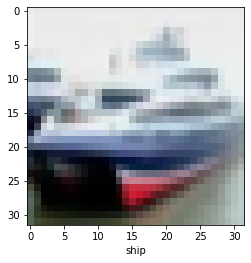

In [21]:
plot_sample(X_test,y_test,1)

In [22]:
y_pred=model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classes[np.argmax(y_pred[1])])

ship
